In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Case_study.csv")
df.head(10)

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand8,Brand9,Brand10,Brand11,Brand12,Number of Brands,Total Sales,cluster
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,30826.6100,0.0,0.0,1,30826.6100,3
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.000,0.0000,0.0,0.0,3,67713.1692,0
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,12948.696,0.0000,0.0,0.0,3,65006.4054,0
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0,0.0000,1
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0,0.0000,1
5,Retailer 6,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0,0.0000,1
6,Retailer 7,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,25897.392,0.0000,0.0,0.0,1,25897.3920,3
7,Retailer 8,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0,0.0000,1
8,Retailer 9,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0,0.0000,1
9,Retailer 10,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,31309.9064,0.0,0.0,1,31309.9064,3


In [3]:
##Making a separate column to form categorical variables from the cluster column
df=df.drop(['Total Sales','Retailer Name'],axis=1)
df['Category of Retailer']='High'
df.loc[df.cluster==1,"Category of Retailer"] = "No_sales"
df.loc[df.cluster==3,"Category of Retailer"] = "Low"
df.loc[df.cluster==0,"Category of Retailer"] = "Moderate"
df.loc[df.cluster==2,"Category of Retailer"] = "High"

In [4]:
df=df.drop(['cluster'],axis=1)

In [5]:
##Defining a normailzation function
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [6]:
##Normalizing the dataset
from sklearn.preprocessing import StandardScaler
string_columns=['Brand1','Brand2','Brand3','Brand4','Brand5','Brand6','Brand8','Brand9','Brand10','Brand11','Brand12','Number of Brands']
df_norm=df.copy()
for i in string_columns:
    df_norm[i] =norm_func(df_norm[i])
df_norm

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand8,Brand9,Brand10,Brand11,Brand12,Number of Brands,Category of Retailer
0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.212293,0.0,0.0,0.111111,Low
1,0.048387,0.0,0.0,0.05,0.011438,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.333333,Moderate
2,0.121499,0.0,0.0,0.00,0.009259,0.000000,0.0,0.013889,0.000000,0.0,0.0,0.333333,Moderate
3,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,No_sales
4,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,No_sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,No_sales
9934,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,No_sales
9935,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,No_sales
9936,0.000000,0.0,0.0,0.05,0.000000,0.052171,0.0,0.000000,0.000000,0.0,0.0,0.222222,Low


Retailers are classified namely retailer with 'NO SALES, retailers with 'LOW SALES',Retailers with 'MODERATE SALES'and Retailers with 'HIGH SALES'.
They are encoded as no sales=1, high sales=2, moderate sales=0, high sales=2.

In [7]:
df_norm['Category of Retailer'].value_counts()

No_sales    6449
Low         2170
Moderate     932
High         387
Name: Category of Retailer, dtype: int64

Here, it is seen that the 4 classes are highly imbalanced. Thus, we use SMOTE algorithm and perform random sampling to avoid misclassifications.

In [8]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
y = df_norm['Category of Retailer'] 
x = df_norm.drop(['Category of Retailer'], axis=1) #drop y label
x

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand8,Brand9,Brand10,Brand11,Brand12,Number of Brands
0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.212293,0.0,0.0,0.111111
1,0.048387,0.0,0.0,0.05,0.011438,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.333333
2,0.121499,0.0,0.0,0.00,0.009259,0.000000,0.0,0.013889,0.000000,0.0,0.0,0.333333
3,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9933,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
9934,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
9935,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
9936,0.000000,0.0,0.0,0.05,0.000000,0.052171,0.0,0.000000,0.000000,0.0,0.0,0.222222


In [10]:
print(x.shape, y.shape)

(9938, 12) (9938,)


In [11]:
#x=df_norm.drop(['Category of Retailer'],axis=1)
#y=df_norm['Category of Retailer']
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6956, 12) (6956,)
(2982, 12) (2982,)


In [12]:
#Applying SMOTE oversampling technique to handle imbalanced class labels of dependent variable
columns = x_train.columns
os_train_x,os_train_y = os.fit_resample(x_train, y_train)
os_test_x,os_test_y = os.fit_resample(x_test, y_test)
os_train_X = pd.DataFrame(data=os_train_x,columns=columns )
os_train_Y= pd.DataFrame(data=os_train_y,columns=['y_actual'])
os_test_X = pd.DataFrame(data=os_test_x,columns=columns )
os_test_Y = pd.DataFrame(data=os_test_y,columns=['y_actual'])

In [13]:
print(os_train_X.shape, os_train_Y.shape)
print(os_test_X.shape, os_test_Y.shape)

(18056, 12) (18056, 1)
(7740, 12) (7740, 1)


In [14]:
os_test_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   y_actual  7740 non-null   object
dtypes: object(1)
memory usage: 60.6+ KB


In [15]:
print('Original dataset shape : ',y.value_counts())
print('Resampled dataset shape : ', os_test_Y.value_counts())

Original dataset shape :  No_sales    6449
Low         2170
Moderate     932
High         387
Name: Category of Retailer, dtype: int64
Resampled dataset shape :  y_actual
No_sales    1935
Moderate    1935
Low         1935
High        1935
dtype: int64


Here, initially the classes were highly imbalanced. Using smote algorithm all classes have been brought to same sizes

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import interp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

In [24]:
sgd=SGDClassifier()
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [100,500,1000], 
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    }

sgd_cv=RandomizedSearchCV(sgd,grid,cv=10,return_train_score=True,n_jobs=5,verbose=10)

In [25]:
sgd_cv.fit(os_train_X,os_train_Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.1s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    6.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:    8.9s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   10.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   11.0s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=5,
                   param_distributions={'a

In [26]:
sgd_cv.best_params_

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}

Best value of alpha obtained after running RandomizedSearchCV 

In [27]:
sgd_cv.best_score_

0.9755202571913258

Maximum accuarcy of 81% obtained after running RandomizedSearchCV with best parameters for SGD classifier

In [28]:
results = pd.DataFrame.from_dict(sgd_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_max_iter,param_loss,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.485886,0.061661,0.011888,0.006083,l2,500,log,10,"{'penalty': 'l2', 'max_iter': 500, 'loss': 'lo...",0.249723,0.500000,0.249723,0.250277,0.249723,0.250277,0.250416,0.250416,0.250416,0.250416,0.275139,0.074954,6,0.250031,0.500000,0.250031,0.249969,0.250031,0.249969,0.249954,0.249954,0.249954,0.249954,0.274985,0.075005
1,0.592875,0.052772,0.008855,0.005537,l2,500,log,0.0001,"{'penalty': 'l2', 'max_iter': 500, 'loss': 'lo...",0.982835,0.981728,0.984496,0.954596,0.970653,0.985050,0.985042,0.960111,0.988920,0.961773,0.975520,0.011923,1,0.985231,0.985477,0.985046,0.956431,0.978708,0.985231,0.980063,0.960741,0.987016,0.957541,0.976148,0.012015
2,0.414825,0.041471,0.015024,0.005975,l2,1000,log,1,"{'penalty': 'l2', 'max_iter': 1000, 'loss': 'l...",0.250277,0.249723,0.497785,0.400332,0.249723,0.372093,0.249861,0.250416,0.393352,0.500277,0.341384,0.099289,5,0.249969,0.250031,0.498215,0.391692,0.250031,0.376308,0.250015,0.249954,0.395422,0.499969,0.341161,0.099081
3,0.510780,0.041016,0.010269,0.003590,l2,1000,log,10,"{'penalty': 'l2', 'max_iter': 1000, 'loss': 'l...",0.249723,0.249723,0.250277,0.250277,0.249723,0.249723,0.249861,0.250416,0.249861,0.250416,0.250000,0.000290,9,0.250031,0.250031,0.249969,0.249969,0.250154,0.250031,0.250015,0.249954,0.250015,0.249954,0.250012,0.000056
4,0.436784,0.036952,0.012380,0.006391,l2,100,log,0.01,"{'penalty': 'l2', 'max_iter': 100, 'loss': 'lo...",0.688815,0.717608,0.677741,0.718162,0.728128,0.722038,0.698615,0.734626,0.726870,0.735180,0.714778,0.018745,3,0.679446,0.724862,0.679631,0.718769,0.727385,0.726892,0.711772,0.726355,0.727278,0.724878,0.714727,0.018189
5,0.387487,0.034974,0.012601,0.008446,l2,500,log,1000,"{'penalty': 'l2', 'max_iter': 500, 'loss': 'lo...",0.249723,0.249723,0.249723,0.250277,0.249723,0.249723,0.249861,0.249861,0.250416,0.249861,0.249889,0.000238,10,0.250031,0.250031,0.250031,0.249969,0.250031,0.250031,0.250015,0.250015,0.249954,0.250015,0.250012,0.000026
6,0.576764,0.040114,0.011121,0.005260,l2,100,log,0.0001,"{'penalty': 'l2', 'max_iter': 100, 'loss': 'lo...",0.945183,0.981728,0.970100,0.986157,0.924695,0.987818,0.930194,0.961219,0.988920,0.985596,0.966161,0.023452,2,0.949723,0.984615,0.968554,0.982338,0.920062,0.984492,0.920436,0.968248,0.986401,0.986155,0.965102,0.024965
7,0.370012,0.028628,0.011484,0.005211,l2,1000,log,1000,"{'penalty': 'l2', 'max_iter': 1000, 'loss': 'l...",0.249723,0.250277,0.249723,0.422481,0.249723,0.250277,0.259834,0.249861,0.249861,0.249861,0.268162,0.051525,7,0.250031,0.249969,0.250031,0.416677,0.250031,0.249969,0.259123,0.250015,0.250015,0.250015,0.267588,0.049771
8,0.385606,0.024013,0.010474,0.005462,l2,1000,log,100,"{'penalty': 'l2', 'max_iter': 1000, 'loss': 'l...",0.250277,0.250277,0.249723,0.249723,0.250277,0.250277,0.249861,0.250416,0.249861,0.249861,0.250055,0.000257,8,0.249969,0.249969,0.250031,0.250031,0.249969,0.249969,0.250015,0.249954,0.250015,0.250015,0.249994,0.000029
9,0.374524,0.073258,0.007956,0.004786,l2,500,log,0.1,"{'penalty': 'l2', 'max_iter': 500, 'loss': 'lo...",0.501107,0.500554,0.501107,0.500000,0.499446,0.499446,0.499723,0.499723,0.500831,0.500277,0.500222,0.000617,4,0.500123,0.500185,0.500123,0.500246,0.500308,0.500308,0.500277,0.500277,0.500154,0.500215,0.500222,0.000069


In [29]:
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']

In [30]:
max_alpha = results['param_alpha'].values
train_auc = results['mean_train_score']
test_auc = results['mean_test_score']
train_auc_dataframe =pd.DataFrame(data={'Best Alpha':max_alpha,'Train_AUC_Score':train_auc})
test_auc_dataframe =pd.DataFrame(data={'Best Alpha':max_alpha,'Test_AUC_Score':test_auc})

In [31]:
train_auc_dataframe

,Best Alpha,Train_AUC_Score
1,0.0001,0.976148
6,0.0001,0.965102
4,0.01,0.714727
9,0.1,0.500222
2,1,0.341161
0,10,0.274985
3,10,0.250012
8,100,0.249994
5,1000,0.250012
7,1000,0.267588


In [32]:
test_auc_dataframe

,Best Alpha,Test_AUC_Score
1,0.0001,0.975520
6,0.0001,0.966161
4,0.01,0.714778
9,0.1,0.500222
2,1,0.341384
0,10,0.275139
3,10,0.250000
8,100,0.250055
5,1000,0.249889
7,1000,0.268162


In [34]:
##Fitting the SGD classifier model 
model1= SGDClassifier(loss='log',alpha=0.0001, max_iter=500, penalty= 'l2')
model1.fit(os_train_X, os_train_Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
model1.decision_function(os_train_X)

array([[-13.47332516,   0.06528741,  -2.14831211,   2.15027213],
       [-10.45304055,  -0.3641312 ,  -1.96168613,  -1.39390301],
       [-13.47332516,   0.06528741,  -2.14831211,   2.15027213],
       ...,
       [ -1.17339654,  -1.58479547,  -1.18153552, -13.01883654],
       [ -4.35908152,  -1.35224516,  -1.55539211,  -8.59947365],
       [ -1.51144957,  -1.15198513,  -1.10582482, -12.98500217]])

In [36]:
model1.decision_function(os_test_X)

array([[-13.47332516,   0.06528741,  -2.14831211,   2.15027213],
       [-13.47332516,   0.06528741,  -2.14831211,   2.15027213],
       [-13.47332516,   0.06528741,  -2.14831211,   2.15027213],
       ...,
       [ -4.36327162,  -1.13480273,  -1.54698999,  -8.609061  ],
       [ -4.33225142,  -0.92929721,  -1.46260047,  -9.05467459],
       [ -4.37198174,  -1.22675373,  -1.563701  ,  -8.54920492]])

In [37]:
y_pred_train =model1.predict(os_train_X)
y_pred_test =model1.predict(os_test_X)

In [38]:
print(y_pred_train)

['No_sales' 'Low' 'No_sales' ... 'High' 'Low' 'Moderate']


In [39]:
print(y_pred_test)

['No_sales' 'No_sales' 'No_sales' ... 'Low' 'Low' 'Low']


In [40]:
cm_train = (metrics.confusion_matrix(os_train_Y,y_pred_train))
cm_test = (metrics.confusion_matrix(os_test_Y,y_pred_test))

print('Train Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)

Train Confusion Matrix
[[4514    0    0    0]
 [   0 4505    9    0]
 [1045 2494  975    0]
 [   0    0    0 4514]]
Test Confusion Matrix
[[1935    0    0    0]
 [   0 1931    4    0]
 [ 444 1044  447    0]
 [   0    0    0 1935]]


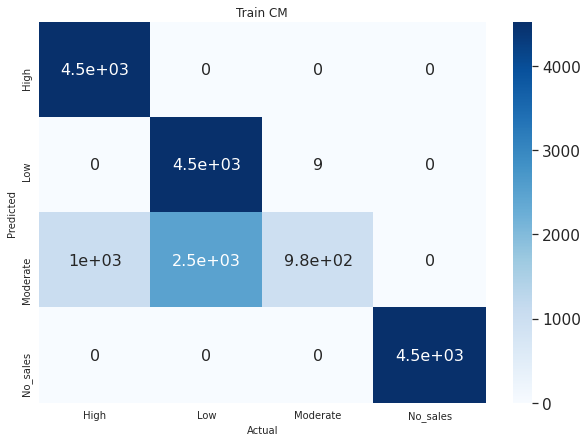

In [41]:
##Beautifying confusion matrix
train_data = metrics.confusion_matrix(os_train_Y,y_pred_train)
df_cm = pd.DataFrame(train_data, columns=np.unique(os_train_Y), index = np.unique(y_pred_train))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
plt.title('Train CM')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

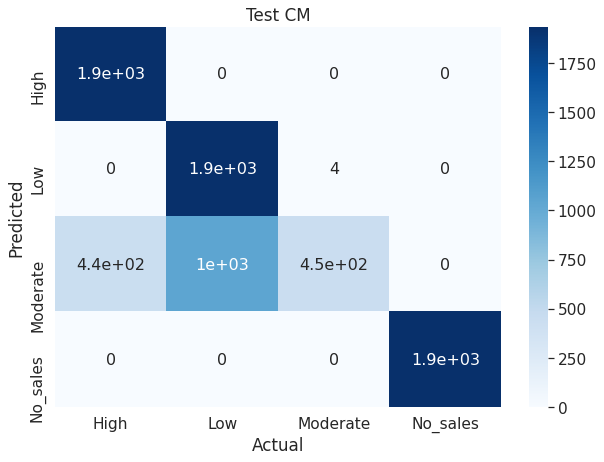

In [42]:
test_data = metrics.confusion_matrix(os_test_Y,y_pred_test)
df_cm = pd.DataFrame(test_data, columns=np.unique(os_test_Y), index = np.unique(y_pred_test))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
plt.title('Test CM')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [43]:
from sklearn.metrics import classification_report
print(classification_report(os_train_Y,y_pred_train))

              precision    recall  f1-score   support

        High       0.81      1.00      0.90      4514
         Low       0.64      1.00      0.78      4514
    Moderate       0.99      0.22      0.35      4514
    No_sales       1.00      1.00      1.00      4514

    accuracy                           0.80     18056
   macro avg       0.86      0.80      0.76     18056
weighted avg       0.86      0.80      0.76     18056



In [44]:
print(classification_report(os_test_Y,y_pred_test))

              precision    recall  f1-score   support

        High       0.81      1.00      0.90      1935
         Low       0.65      1.00      0.79      1935
    Moderate       0.99      0.23      0.37      1935
    No_sales       1.00      1.00      1.00      1935

    accuracy                           0.81      7740
   macro avg       0.86      0.81      0.76      7740
weighted avg       0.86      0.81      0.76      7740



In [57]:
print('The training accuracy of the model is:{}'.format(accuracy_score(os_train_Y,y_pred_train)))
print('The testing accuracy of the model is:{}'.format(accuracy_score(os_test_Y,y_pred_test)))

The training accuracy of the model is:0.8035002215330084
The testing accuracy of the model is:0.807235142118863


In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import interp
from sklearn.ensemble import GradientBoostingClassifier

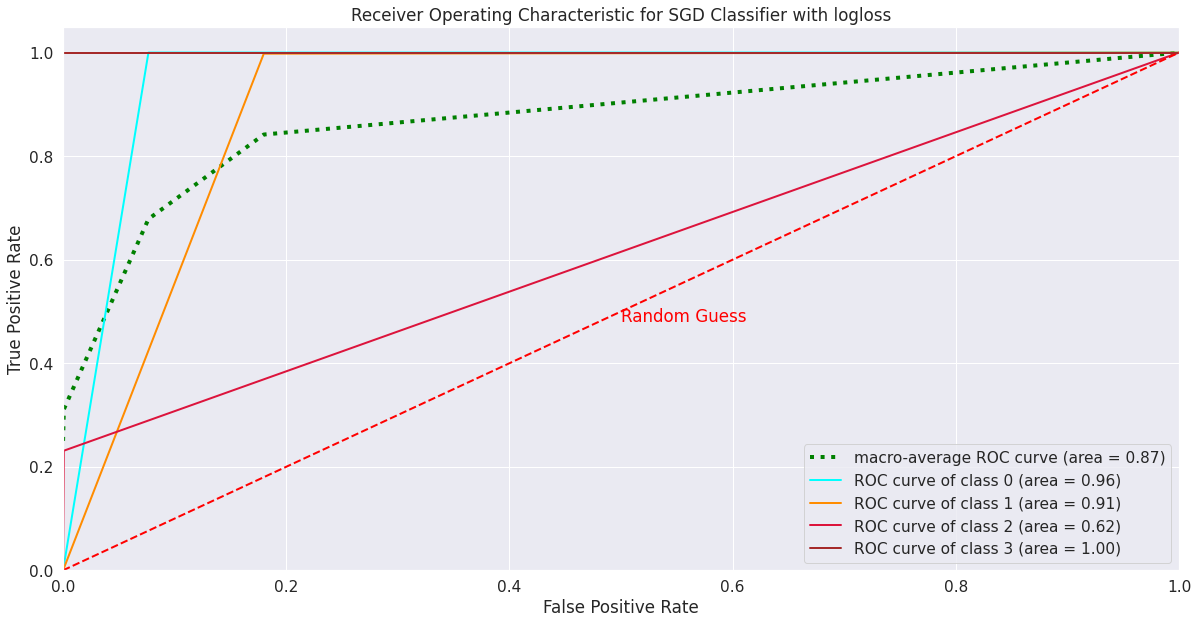

In [54]:
##Plotting curve for Logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import interp
from itertools import cycle

# Binarize the output
y1= label_binarize(os_test_Y, classes=[0, 1, 2,3])
n_classes = y1.shape[1]
y_score =model1.fit(os_train_X,os_train_Y).decision_function(os_test_X)
### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(os_test_Y))[:, i], np.array(pd.get_dummies(y_pred_test))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(20,10))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'crimson','brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SGD Classifier with logloss')
plt.legend(loc="lower right")
plt.show()
